# Clasificación con Tensorflow: Dataset Fashion MNIST

Esta Guia usa tf.keras, un API de alto nivel para construir y entrenar modelos en Tensorflow. El dataset Fashion MNIST contiene más de 70000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) 

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

from plot_functions_mnist import *
# TensorFlow y tf.keras
import tensorflow as tf ##pip install tensorflow
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage import io


60,000 imagenes son usadas para entrenar la red neuronal y 10,000 imagenes son usadas para evaluar si aprende la red a clasificar imagenes. Vamos a importar y cargar el set de datos de MNIST directamente de TensorFlow

Al cargar el set de datos, devuelve cuatro objetos en NumPy:

+ Los objetos train_images y train_labels son los objetos de training — el modelo de datos los usa para aprender.
+ El modelo es probado contra los objetos test set, el test_images, y test_labels.

In [2]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_labels)


[5 0 4 ... 5 6 8]


 Los labels son números enteros, que van del 0 al 9. Estos corresponden a la clase de ropa que la imagen representa. Cada imagen es mapeada a una unica etiqueta.

In [3]:

class_dict = {
  '0': 0,
  '1': 1,
  '2': 2,
    '3':3,
    '4': 4,
    '5':5,
    '6':6,
    '7':7,
    '8':8, 
    '9':9
}

Exploremos el formato del set de datos antes de entrenar el modelo. Lo siguiente muestra que hay 60,000 imágenes en el set de entrenamiento, con cada imagen representada por píxeles de 28x28

In [4]:

##dimensiones del dataset


In [5]:
#número de ejemplos en el entrenamiento


In [6]:
#número de ejemplos en el conjunto de test


## Preprocesado de datos

El set de datos debe ser pre-procesado antes de entrenar la red. Si inspeccionamos la primera imagen en el set de entrenamiento, veremos que los valores de los pixeles estan entre 0 y 255:

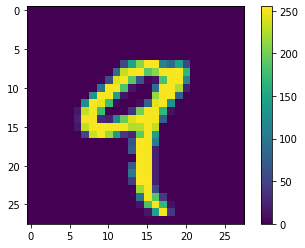

In [7]:
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()

Escalamos los valores de cada pixel de la imagen en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacerlo, dividimos los valores por 255. Es importante que el training set y el testing set se pre-procesen siempre de la misma forma

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que el set de datos está en el formato adecuado y podemos construir y entrenar la red, vamos a mostrar las primeras 25 imagenes de el training set y mostramos el nombre de cada clase debajo de cada imagen

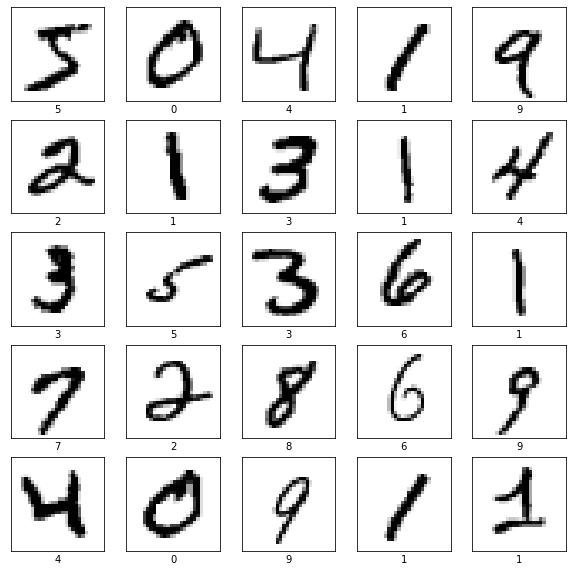

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) ##vamos a mostrar las gráficas posicionadas en 5 filas y 5 columnas
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)#blanco y negro
    plt.xlabel(train_labels[i])
plt.show()

In [10]:
train_images[6]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Construimos el modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

Este será un modelo sencillo de 3 capas de clasificación, sin aplicar filtros de convolución iniciales, ya que las imágenes han sido preprocesadas y se trata de imágenes sencillas.

La mayoria de aprendizaje profundo consiste de unir capas sencillas. La mayoria de las capas como tf.keras.layers.Dense, tienen parametros que son aprendidos durante el entrenamiento.

La primera capa de esta red, tf.keras.layers.Flatten, transforma el formato de las imágenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Es como si separamos cada capa de las filas de pixeles de una imagen y las alineamos todas. Esta capa no tiene parametros que aprender; solo reformatea el conjunto de datos.

Después de que los píxeles están "aplanados", la secuencia consiste de dos capas tf.keras.layers.Dense. Estas están densamente conectadas, o completamente conectadas. La primera capa Dense tiene 128 nodos (o neuronas). La segunda (y última) capa es una capa de 10 nodos softmax que devuelve 10 probabilidades que suman a 1. Estas indican la probabilidad de que la actual imagen pertenezca a una de las 10 clases.

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),##reformateo de la disposición de los pixeles
    keras.layers.Dense(128, activation='relu'),## 128 neuronas completamente conectadas
     keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')##devuelve una probabilidad para cada numero del 0 al 9
])

Antes de que el modelo esté listo para entrenar , se necesitan algunas configuraciones más. Estas son agregadas durante la compilación del modelo:

+ Loss function —Esto mide qué tan exacto es el modelo durante el entrenamiento. Queremos minimizar esta función para dirigir el modelo en la dirección adecuada.
+ Optimizer — Esto es como el modelo se actualiza basado en el set de datos que ve y la función de pérdida.
+ Metrics — Se usan para monitorear los pasos de entrenamiento y de pruebas. Este ejemplo usa el accuracy (exactitud) , que indica la fracción de la imagenes que son correctamente clasificadas.

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenamos el modelo

Entrenar el modelo de red neuronal requiere de los siguientes pasos:

+ Pasamos los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento está en los objetos train_images y train_labels.
+ El modelo aprende a asociar imágenes y etiquetas.
+ Le pedimos al modelo que haga predicciones sobre un set de datos que se encuentran en el objeto test_images. Verificamos que las predicciones sean iguales a las etiquetas del objeto test_labels.

Para comenzar a entrenar, llamamos al método model.fit, es llamado así porque fit (ajusta) el modelo a el set de datos de entrenamiento:

In [13]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2934 - accuracy: 0.9148
Epoch 2/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1414 - accuracy: 0.9577
Epoch 3/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1085 - accuracy: 0.9668
Epoch 4/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0858 - accuracy: 0.9733
Epoch 5/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0743 - accuracy: 0.9772
Epoch 6/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0644 - accuracy: 0.9794
Epoch 7/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0581 - accuracy: 0.9813
Epoch 8/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0529 - accuracy: 0.9831
Epoch 9/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0470 - accuracy: 0.9845
Epoch 10/10
60

 Este modelo alcanza una exactitud de 0.90 (o 90%) sobre el set de datos de entrenamiento.

## Hacer predicciones

In [14]:
model.save('model_mnist.sav') 
#print(class_dict)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_mnist.sav\assets


Con el modelo entrenado, podemos usarlo para hacer predicciones sobre nuevas imágenes.

Aquí, el modelo ha predecido la etiqueta para cada imagen en el set de datos de test (prueba). Miremos la primera predicción:

2

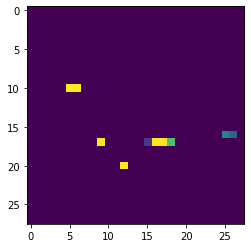

In [15]:
'''from PIL import Image
from numpy import*

temp=asarray(Image.open('./2.png').convert('L')) # 'L' -> grayscale
x=temp.shape[0] #ancho de la imagen
y=temp.shape[1] #alto de la imagen
temp = temp.resize((28,28))
yy = temp.reshape(1,28,28)

predictions = model.predict(yy / 255.0)


print(np.argmax(predictions))'''


##librerias
from PIL import Image
from numpy import*
import PIL.ImageOps

#path a la imagen
temp=Image.open('./imagen.png')
temp.show() 
#invertimos la imagen
temp = PIL.ImageOps.invert(temp.convert("RGB"))

#cambiamos tamaño
temp = temp.resize((28,28))

#pasamos a escala de grises
temp=temp.convert('L') # 'L' -> grayscale
#normalizamos los colores entre 0 y 1
temp=asarray(temp)/255

#mostramos la imagen
plt.imshow(temp)

#hacemos la prediccion usando el modelo con predict
prediction = model.predict(temp.reshape(1,28,28))

#cogemos el indice o posicion con mayor probabilidad
np.argmax(prediction)


In [16]:
from PIL import Image
from numpy import*

temp=Image.open('./3.png')

temp = temp.resize((28,28))
temp=temp.convert('L') # 'L' -> grayscale
#temp.show()
temp
''' 
temp=asarray(temp)/255

type(temp)
temp[temp == 1] = 0
prediction = model.predict(temp.reshape(1,28,28))
print(temp.reshape(1,28,28))'''

' \ntemp=asarray(temp)/255\n\ntype(temp)\ntemp[temp == 1] = 0\nprediction = model.predict(temp.reshape(1,28,28))\nprint(temp.reshape(1,28,28))'

In [17]:
prediction

array([[0.05387257, 0.00294509, 0.7283667 , 0.00236559, 0.0131645 ,
        0.06273594, 0.04472263, 0.08205795, 0.00756338, 0.00220555]],
      dtype=float32)

In [18]:
''' from PIL import Image
from numpy import*
import numpy as np

temp=Image.open('./3.png')

temp = temp.resize((28,28))
temp=temp.convert('L') # 'L' -> grayscale
#temp.show()

temp=asarray(temp)/255
temp = np.abs(temp-1)
prediction = model.predict(temp.reshape(1,28,28))
temp'''

" from PIL import Image\nfrom numpy import*\nimport numpy as np\n\ntemp=Image.open('./3.png')\n\ntemp = temp.resize((28,28))\ntemp=temp.convert('L') # 'L' -> grayscale\n#temp.show()\n\ntemp=asarray(temp)/255\ntemp = np.abs(temp-1)\nprediction = model.predict(temp.reshape(1,28,28))\ntemp"

9

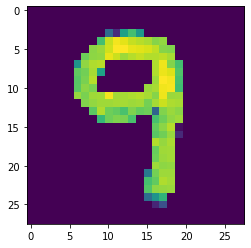

In [58]:
from PIL import Image
from numpy import*
import PIL.ImageOps

#path a la imagen
temp=Image.open('./imagen2.png')
#
#invertimos la imagen
temp = PIL.ImageOps.invert(temp.convert("RGB"))

##cambiamos tamaño
temp = temp.resize((28,28))
#pasamos a escala de grises
temp=temp.convert('L') # 'L' -> grayscale
#normalizamos los colores entre 0 y 1
temp=asarray(temp)/255

#mostramos la imagen
plt.imshow(temp)

#hacemos la prediccion usando el modelo con predict
a = model.predict(temp.reshape(1,28,28))

#cogemos el indice o posicion con mayor probabilidad
np.argmax(a)

Ua prediccion es un arreglo de 10 números. Estos representan el nivel de "confianza" del modelo sobre las imágenes de cada uno de los 10 articulos de moda/ropa. Podemos revisar cual tiene el nivel más alto de confianza:

In [20]:
np.argmax(prediction)

2

Entonces,el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o lo que es lo mismo, class_names[9]. Examinando las etiquetas de test o de pruebas muestra que esta clasificaion es correcta:

In [21]:
print(temp)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0

Graficamos esto para poder ver todo el set de la prediccion de las 10 clases.

NameError: name 'predictions' is not defined

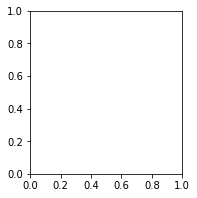

In [22]:
'''
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()'''

In [ ]:




""" image=io.imread("./1.png")/255.0
print("- Dimensiones de la imagen:")
print(image.shape)
i = plt.imshow(image,vmin=0,vmax=1)

#i = mpimg.imread("./1.png")
i = 0
imgplot = plt.imshow(i)
print(i)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()"""
'''
from PIL import Image

img =  mpimg.imread("./1.png")
print(img)
imgplot = plt.imshow(img)

i = img
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show() 
'''



In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Vamos a probar con el dataset MNIST (Para el Reto...)

¿Os atrevéis a intentar repetir el proceso con otro dataset? Este es muy similar, pero con números escritos a mano.

In [ ]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()